Concrete_Strength

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [31]:
# Load Data
data = pd.read_csv("/content/drive/MyDrive/compresive_strength_concrete.txt")
data.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [32]:
data.shape

(1030, 9)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [34]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [35]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [36]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

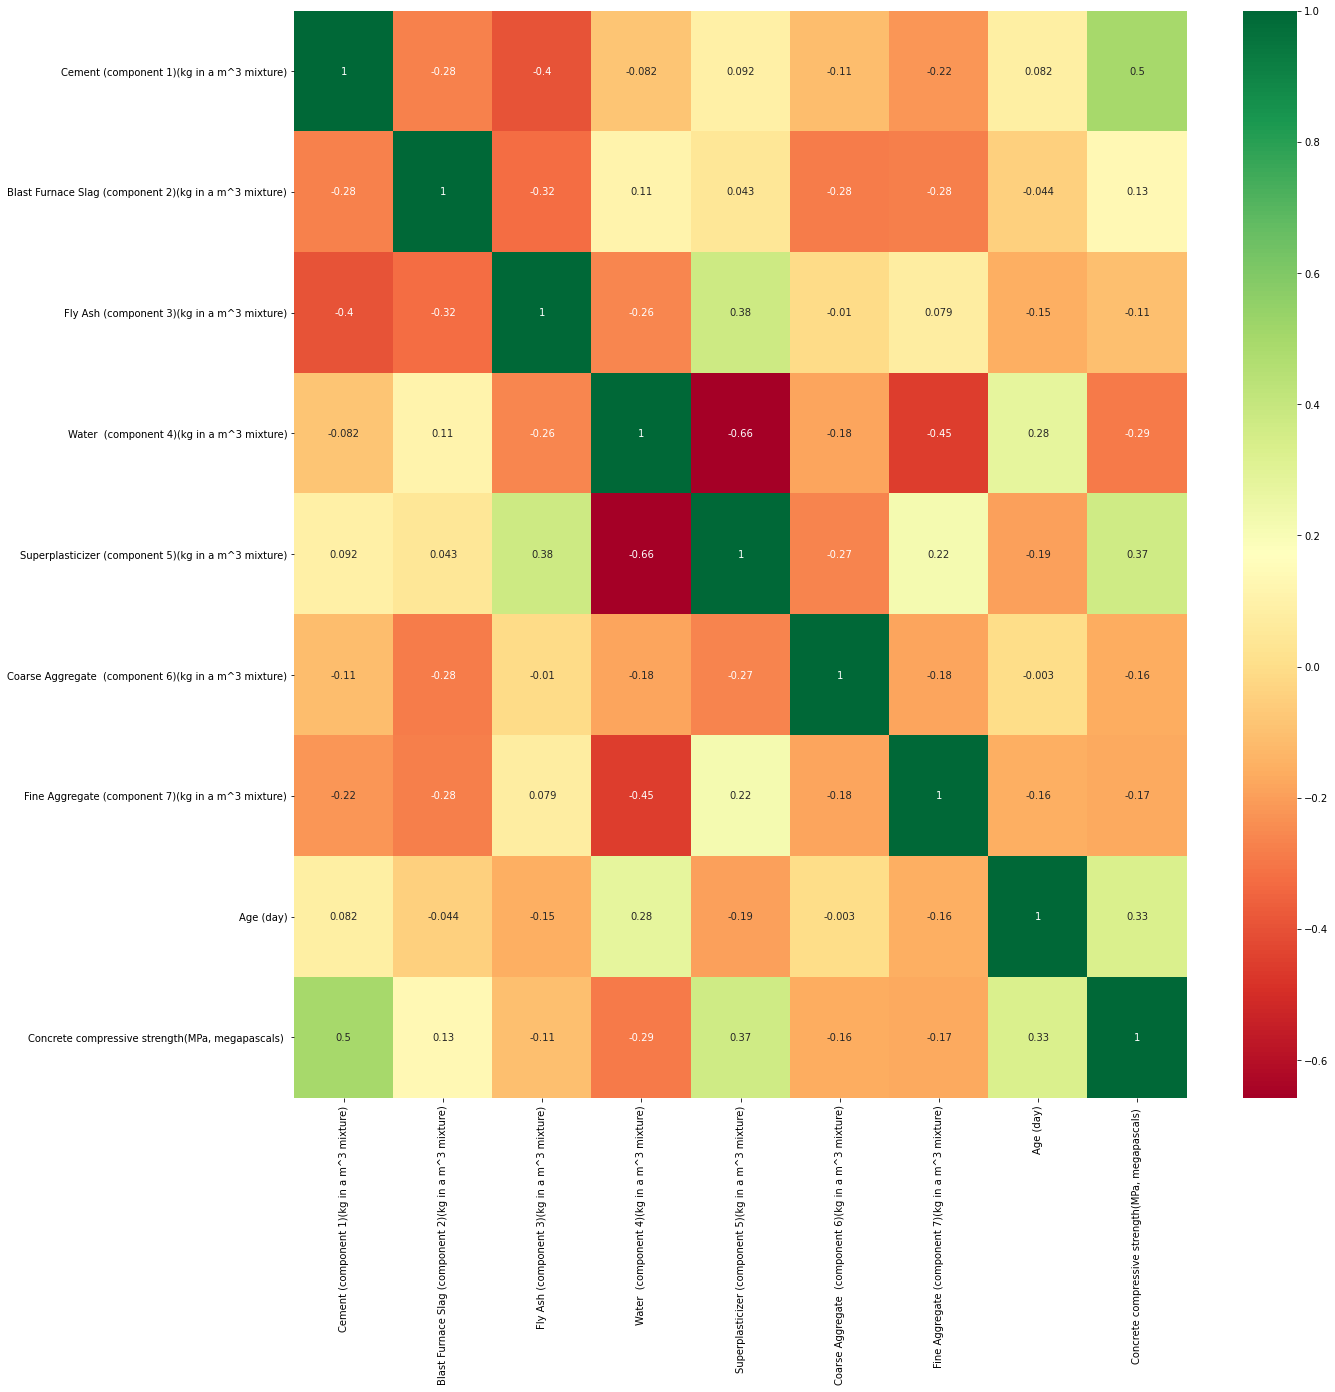

In [37]:
correlation=data.corr()
top_corr_features=correlation.index
plt.figure(figsize=(20,20))
a=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [38]:
data1=data[['Cement (component 1)(kg in a m^3 mixture)','Superplasticizer (component 5)(kg in a m^3 mixture)','Age (day)','Concrete compressive strength(MPa, megapascals) ']]
data1.head(3)

,Cement (component 1)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,2.5,28,79.99
1,540.0,2.5,28,61.89
2,332.5,0.0,270,40.27


In [39]:
# Split Data
X=data1[['Cement (component 1)(kg in a m^3 mixture)','Superplasticizer (component 5)(kg in a m^3 mixture)','Age (day)']]
Y=data1[['Concrete compressive strength(MPa, megapascals) ']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=8)

In [40]:
# Normalizing train and test data data
mean = X_train.mean(axis=0)
X_train-= mean
std = X_train.std(axis=0)
X_train /= std

mean = Y_train.mean(axis=0)
Y_train-= mean
std = Y_train.std(axis=0)
Y_train /= std

mean = X_test.mean(axis=0)
X_test-= mean
std = X_test.std(axis=0)
X_test /= std

mean = Y_test.mean(axis=0)
Y_test-= mean
std = Y_test.std(axis=0)
Y_test/= std

In [41]:
X_train.shape

(721, 3)

In [42]:
X_test.shape

(309, 3)

In [43]:
Y_train.shape

(721, 1)

In [44]:
Y_test.shape

(309, 1)

In [45]:
def build_model():
      model = Sequential()
      model.add(tf.keras.layers.Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
      model.add(tf.keras.layers.Dense(8, activation='relu'))
      model.add(tf.keras.layers.Dense(6, activation='relu'))
      model.add(tf.keras.layers.Dense(1))
      model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])
      return model

In [29]:
# Validation
k=5
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []

all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    X_val =X_train[i * num_val_samples: (i + 1) * num_val_samples]
    Y_val = Y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_X_train = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_Y_train = np.concatenate(
        [Y_train[:i * num_val_samples],
         Y_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    
model = build_model()
history = model.fit(partial_X_train, partial_Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [46]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

Building the history of successive mean K-fold validation scores


In [47]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [48]:
average_mae_history

[0.4971212148666382,
 0.4371243715286255,
 0.43850982189178467,
 0.4389914870262146,
 0.4623308777809143,
 0.4487224221229553,
 0.4352794885635376,
 0.4156735837459564,
 0.457180917263031,
 0.4346155524253845,
 0.4188656806945801,
 0.42645323276519775,
 0.42104607820510864,
 0.42753949761390686,
 0.46590328216552734,
 0.4436190128326416,
 0.4278855621814728,
 0.42165499925613403,
 0.42193493247032166,
 0.4328407049179077,
 0.43117421865463257,
 0.41709768772125244,
 0.43288883566856384,
 0.41328784823417664,
 0.42215800285339355,
 0.4273073971271515,
 0.4171375334262848,
 0.42960333824157715,
 0.4348198175430298,
 0.43028324842453003,
 0.4689963161945343,
 0.43490827083587646,
 0.42707082629203796,
 0.449088990688324,
 0.4281715154647827,
 0.4343264698982239,
 0.42848527431488037,
 0.4082053601741791,
 0.41772493720054626,
 0.4270203709602356,
 0.42367884516716003,
 0.43803393840789795,
 0.41050785779953003,
 0.4315858781337738,
 0.4452133774757385,
 0.4310711622238159,
 0.437695384025

Plotting validation scores

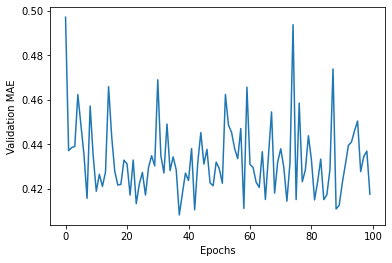

In [49]:
import matplotlib.pyplot as plt
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

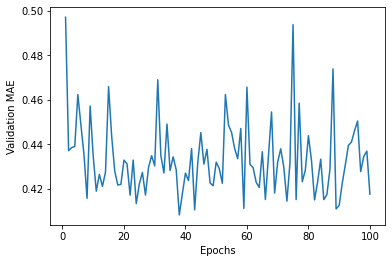

In [50]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

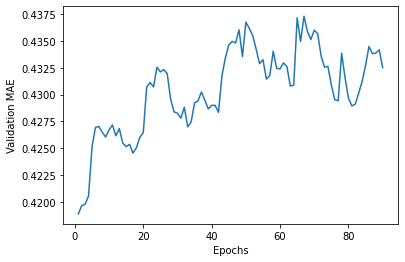

In [51]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Training the Final Model

In [52]:
model = build_model()
model.fit(X_train, Y_train,
          epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.2963 - mae: 0.4099


In [53]:
test_mse_score

0.2962932884693146

In [54]:
test_mae_score

0.4098994731903076

In [55]:
#Prediction
Prediction=model.predict(X_test)
Prediction

array([[-1.2964256 ],
       [ 0.16111925],
       [-0.01998237],
       [ 0.28833187],
       [-1.2315063 ],
       [-1.1673203 ],
       [ 0.89044374],
       [ 0.17987826],
       [ 0.4521569 ],
       [ 1.1951077 ],
       [ 0.7110895 ],
       [ 0.05798993],
       [-1.0656496 ],
       [-0.5440826 ],
       [ 0.9844678 ],
       [-0.50405884],
       [-0.42699367],
       [ 0.5183189 ],
       [ 0.41491574],
       [-0.01936471],
       [ 1.1643026 ],
       [-0.57296777],
       [ 0.18542632],
       [-1.1439713 ],
       [ 0.43547016],
       [-0.09012903],
       [ 0.2974077 ],
       [-0.93873197],
       [-0.24194743],
       [-0.78451955],
       [-0.78663296],
       [-0.94228816],
       [ 0.60612494],
       [ 0.40181595],
       [-0.80466217],
       [-0.9360849 ],
       [-1.2938948 ],
       [ 0.8934911 ],
       [-0.76553035],
       [ 0.580048  ],
       [ 0.4032749 ],
       [-0.18058586],
       [ 1.0536847 ],
       [-1.4849665 ],
       [ 0.01790786],
       [-0

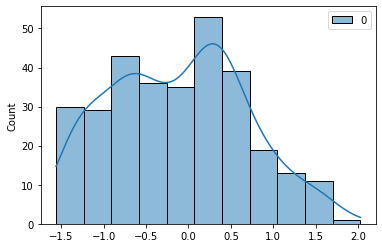

In [57]:
sns.histplot(Prediction,kde=True)